Work in progress code to load, extract regressors, and run psytrack on data from behavior

In [1]:
import os
from scipy.io import loadmat
import numpy as np

folderpath = r'W:\Data\2AFC_Behavior';
animals = ['c_129', 'opto_69', 'opto_70', 'opto_96', 'opto_97'];

#for a in animals:
#    file_of_interest = 'analyze_animal_'+a+'.mat'
#    path = os.path.join(folderpath,a, file_of_interest);
    #mouse = loadmat(path, struct_as_record = False, squeeze_me = True);
    
    

In [2]:
a = animals[0];
file_data = 'analyze_animal_'+a+'.mat'
path = os.path.join(folderpath,a, file_data);
mouse_mat = loadmat(path, struct_as_record = False, squeeze_me = True, mat_dtype = True);
m = mouse_mat['animal']

In [3]:
file_training = 'analyze_training_'+a+'.mat'
path = os.path.join(folderpath,a, file_training);
mouse_train = loadmat(path,struct_as_record = False, squeeze_me = True, mat_dtype = True);
t = mouse_train['training']


In [4]:
m.LED = np.reshape(m.LED[round(t.trials_opto) : round(t.trials_proficient)], ((round(t.trials_proficient) - round(t.trials_opto)),1))
m.lick = m.lick[:,round(t.trials_opto) : round(t.trials_proficient)] 
m.sessionNum = np.reshape(m.sessionNum[round(t.trials_opto) : round(t.trials_proficient)], ((round(t.trials_proficient) - round(t.trials_opto)),1))
m.stimulus = np.reshape(m.stimulus[round(t.trials_opto) : round(t.trials_proficient)], ((round(t.trials_proficient) - round(t.trials_opto)),1))
m.target = np.reshape(m.target[round(t.trials_opto) : round(t.trials_proficient)], ((round(t.trials_proficient) - round(t.trials_opto)),1))
m.rxnTime = np.reshape(m.rxnTime[round(t.trials_opto) : round(t.trials_proficient)], ((round(t.trials_proficient) - round(t.trials_opto)),1))

In [6]:
import numpy as np
from scipy.stats import zscore

In [14]:
lick = np.array(m.lick)
rightward = lick[0,:] + lick[3,:] - lick[1,:] - lick[2,:]
previous_choice = np.reshape(np.append(0, rightward[0:-1]), (len(rightward),1)

In [27]:
new_session = np.array(np.append(0, np.diff(m.sessionNum.T)), dtype = bool)
previous_correct.shape

(1550,)

In [30]:

lick = np.array(m.lick)
rightward = lick[0,:] + lick[3,:] - lick[1,:] - lick[2,:]
previous_choice = np.reshape(np.append(0, rightward[0:-1]), (len(rightward),1))
answer = np.array(m.target)
led = m.LED
correct = lick[0][:] + lick[1][:]
previous_correct = np.reshape(np.append(0, correct[0:-1]), (len(correct),1))
new_session = np.array(np.append(1, np.diff(m.sessionNum.T)), dtype = bool)


previous_choice[new_session,:] = 0
previous_correct[new_session,:] = 0
go_trials = np.array(np.sum(lick[0:4],0), dtype = bool)

reaction = zscore(m.rxnTime[go_trials])
[sess, day_length] = np.unique(m.sessionNum[go_trials], return_counts=True)
stimulus = np.log2(m.stimulus/8)/2
stimulus_direction = np.array(stimulus > 0, dtype = 'int16') - np.array(stimulus < 0, dtype = 'int16')
stimulus_magnitude = np.abs(stimulus)
    
inputs = {'stimulus': stimulus[go_trials], 'stimulus direction': stimulus_direction[go_trials], 'stimulus magnitude': stimulus_magnitude[go_trials], 'previous choice': previous_choice[go_trials], 'previous correct': previous_correct[go_trials], 'reaction time': reaction, 'led': led[go_trials]};


weights = {k: 1 for k in inputs}
weights['bias'] = 1
    
y = rightward[go_trials];
y[y == 1] = 2;
y[y == -1] = 1;
    
regressors = {'inputs': inputs, 'answer': answer, 'correct': correct, 'y': y, 'dayLength': day_length}



(1429, 1)

In [40]:
weight_choice = ['stimulus', 'previous choice', 'previous correct', 'reaction time', 'led'];
regressors['inputs'] = { your_key: regressors['inputs'][your_key] for your_key in weight_choice };
weight_choice.append('bias')
weights = { your_key: weights[your_key] for your_key in weight_choice };
k = len(weights.keys())



In [8]:
lick = np.array(m.lick);
rightward = lick[0][:] + lick[3][:] - lick[1][:] - lick[2][:];
previous_choice = np.append(0, rightward[0:-1]);
answer = np.array(m.target);
led = m.LED;
correct = lick[0][:] + lick[1][:];
previous_correct = np.append(0, correct[0:-1]);

In [42]:
import psytrack as psy
hyper = {'sigInit': 2**4., 'sigma': [2**4.]*k, 'sigDay': 2**4.};
optList = ['sigma', 'sigDay'];
hyp, evd, wMode, hess_info = psy.hyperOpt(regressors, hyper, weights, optList, showOpt = 1);


Initial evidence: -1124.16539
sigma [4. 4. 4. 4. 4. 4.]
sigDay 4.0

Starting optimization...
[3.8272476  3.98400109 3.63592414 3.94167378 4.09854361 3.77043071
 3.99734295]
[3.86026731 3.96984311 3.60091052 4.01838677 4.12552581 3.75725495
 3.99562825]
[3.85342596 3.94955001 3.59256862 4.03594762 4.10013053 3.7573997
 3.99333169]
[3.8349246  3.88655913 3.59635471 4.047682   4.10496227 3.76347298
 3.98660393]
[3.84901811 3.76303255 3.60210359 4.04326208 4.10140913 3.74257386
 3.97324619]
[3.86686129 3.6941436  3.58454318 4.0314816  4.09972199 3.75886675
 3.96438817]
[3.85849046 3.6002218  3.58655884 4.04649748 4.1040133  3.75452944
 3.90117757]
[3.85512832 3.53297388 3.58847959 4.05533778 4.10400917 3.75187039
 3.79897803]
[3.85592086 3.52045253 3.58882557 4.05547412 4.10342014 3.75190945
 3.72754948]
[3.85822626 3.51892713 3.58897292 4.05374626 4.10286454 3.75251899
 3.58365979]
[3.85951896 3.52831865 3.58877105 4.05219242 4.10299774 3.75285631
 3.4856316 ]
[3.8599488  3.53353248 3.58

In [1]:
import pickle

In [45]:
with open('psytrack_IT.pkl', 'rb') as f:
    data = pickle.load(f)

In [46]:
pd

[{'hyp': {'sigInit': 16.0,
   'sigma': array([0.03252023, 0.06631595, 0.00177208, 0.085392  , 0.06287697,
          0.00100428]),
   'sigDay': 0.46282778207991343},
  'evd': -978.5399945029276,
  'wMode': array([[ 5.75748048e-01,  5.76427864e-01,  5.76422813e-01, ...,
          -3.33650360e-02, -3.33064003e-02, -3.33696712e-02],
         [ 2.74731096e-03,  4.86016179e-03,  4.12504341e-03, ...,
           4.14235133e+00,  4.14260480e+00,  4.14260480e+00],
         [ 1.25852991e-01,  1.25852992e-01,  1.25852994e-01, ...,
           1.60844455e-01,  1.60844455e-01,  1.60844455e-01],
         [-1.21646757e+00, -1.21650222e+00, -1.21653687e+00, ...,
          -5.44204086e+00, -5.44225898e+00, -5.44247711e+00],
         [ 1.18972639e+00,  1.18974476e+00,  1.19232339e+00, ...,
           4.03142086e-01,  4.03142086e-01,  4.03142086e-01],
         [-2.80579673e-01, -2.80579674e-01, -2.80579675e-01, ...,
           1.04285710e-01,  1.04285710e-01,  1.04285710e-01]]),
  'animal': 'c_129'},
 {'hy

In [47]:
pd = data['psy_data'];

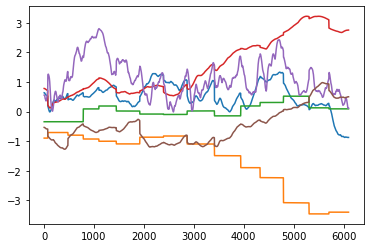

In [50]:
from matplotlib import pyplot
pyplot.plot(pd[1]['wMode'].T)

In [11]:
sorted(['high', 'low', 'previous choice', 'previous correct', 'led', 'bias'])

['bias', 'high', 'led', 'low', 'previous choice', 'previous correct']

In [43]:
new_session = np.array(np.append(1, np.diff(m.sessionNum)), dtype = bool);
previous_choice[new_session] = 0;
previous_correct[new_session] = 0;

In [68]:
go_trials = np.array(np.sum(lick[0:4],0), dtype = bool)
from scipy.stats import zscore
reaction = zscore(m.rxnTime[go_trials])
[sess, day_length] = np.unique(m.sessionNum[go_trials], return_counts=True)

In [98]:
stimulus = np.log2(m.stimulus/8)/2
stimulus_direction = np.array(stimulus > 0, dtype = 'int16') - np.array(stimulus < 0, dtype = 'int16')
stimulus_magnitude = np.abs(stimulus)

In [137]:
inputs = {'stimulus': stimulus, 'stimulus direction': stimulus_direction, 'stimulus_magnitude': stimulus_magnitude, 'previous_chioce': previous_choice, 'previous_correct': previous_correct, 'reaction time': reaction, 'led': led};
weights = {k: 1 for k in inputs}
weights['bias'] = 1

In [26]:
import pickle
with open('psytrack_ET.pkl', 'rb') as f:
    data = pickle.load(f)

In [123]:
data.keys()

dict_keys(['psy_data'])

In [27]:
p = data['psy_data']

In [125]:
p[0].keys()

dict_keys(['hyp', 'evd', 'wMode', 'animal'])

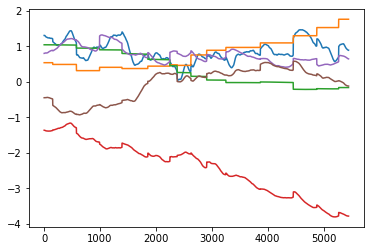

In [36]:
from matplotlib import pyplot
pyplot.plot(p[5]['wMode'].T)

In [21]:
p[3]['animal']

'opto_144'

In [22]:
weight_choice =  ['high', 'low', 'previous choice', 'previous correct', 'led'];

In [24]:
sorted(weight_choice)

['high', 'led', 'low', 'previous choice', 'previous correct']